In [22]:
import os
import cv2
from iptcinfo3 import IPTCInfo
import numpy as np
from random import sample 
import matplotlib.pyplot as plt
import shutil
import pickle

In [23]:
pw_path = '/mnt/c/Users/xpn381/Documents/data/lpw.txt'
file = open(pw_path, mode='r')
pw = file.read()

In [24]:
!echo $pw|sudo -S sudo -S mount -t drvfs d: /mnt/f


[sudo] password for xpn381: mount: /mnt/f: d: already mounted on /mnt/f.


In [25]:
flatten_dir =  "/mnt/f/OctoberJohanArchiveFlatten"
# flatten_dir =  "/mnt/f/OctoberJohanArchiveFlattenTest"
sample_dir = "/mnt/f/OctoberJohanArchiveSample5k"

In [26]:
pkl_file = open('IPTC_keys.pkl', 'rb')

IPTC_keys = pickle.load(pkl_file)

pkl_file.close()

### Functions:

In [27]:
def image_check(img_path):
    
    """Only for testing! open and plots an image"""

    img_array = cv2.imread(img_path)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

    plt.imshow(img_array)

    plt.show()

In [28]:
def count_files(external_dir):
    
    """Counts files in folder tree. Sanity check"""
    
    count = 0
    
    for root, dirs, files in os.walk(external_dir):
        for name in files:
            count += 1
        
    return(count)

In [29]:
def get_images_path(flatten_dir):
    
    """Creates a list of all paths in flatten dir"""
    
    path_list = []
    
    for root, dirs, files in os.walk(flatten_dir):
        for name in files:
            path = os.path.join(root, name)
            path_list.append(path)
            
    return(path_list)

In [30]:
def mk_sample_dir(sample_dir):
    
    """Creates a new folder which is to be the location of the sample 5k images."""
    
    if not os.path.exists(sample_dir):
        os.mkdir(sample_dir) # makes new dir                     
        
    # Or REPLACE old if exist
    else:
        shutil.rmtree(sample_dir) # delets dir and content.. FOREVER!
        os.mkdir(sample_dir) # makes new dir

In [31]:
def copy_sample(path_list5k, size):
        
    files_count = size
    file_count = 0
        
    for i in path_list5k:
        dst = sample_dir + '/' + i.split('/')[-1]
        shutil.copy2(i,dst)
        
        file_count +=1
        
        print(f'moved {file_count} images out of {files_count}...', end= '\r')


In [32]:
def do_it(flatten_dir,sample_dir, size):
    
    path_list = get_images_path(flatten_dir)
    
    path_list5k = sample(path_list,size)
    
    mk_sample_dir(sample_dir)

    copy_sample(path_list5k,size)
    
    # just for testing
    return(path_list5k)

## Run

In [33]:
path_list5k = do_it(flatten_dir,sample_dir, 5000)

# testing

/mnt/f/OctoberJohanArchiveSample5k/JS57592.jpg
key: date created, info: b'20060202'

key: time created, info: b'141311'

key: custom1, info: b'Spanner'

key: custom2, info: b'Raw'

key: custom3, info: b'2006'

key: custom4, info: b'DSC_7038.JPG'



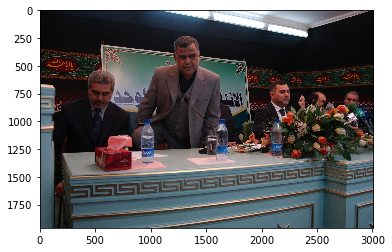

/mnt/f/OctoberJohanArchiveSample5k/JS87761.jpg
key: date created, info: b'20070728'

key: time created, info: b'110646'

key: custom1, info: b'Spanner'

key: custom2, info: b'Raw'

key: custom3, info: b'2007'

key: custom4, info: b'DSC_1466.JPG'



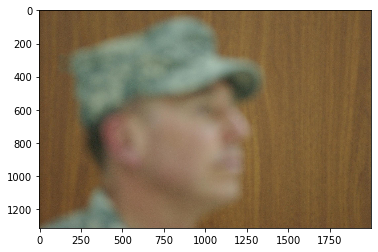

/mnt/f/OctoberJohanArchiveSample5k/JS136528.jpg
key: date created, info: b'00000000'

key: time created, info: b'000000'

key: custom1, info: b'Spanner'

key: custom2, info: b'Raw'

key: custom3, info: b'2009'

key: custom4, info: b'P1010044.JPG'



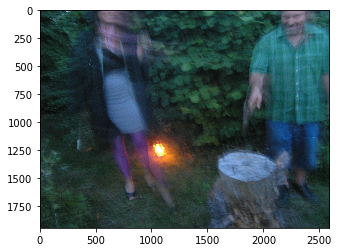

/mnt/f/OctoberJohanArchiveSample5k/JS49287.jpg
key: date created, info: b'20051208'

key: time created, info: b'130035'

key: custom1, info: b'Spanner'

key: custom2, info: b'Raw'

key: custom3, info: b'2005'

key: custom4, info: b'DSC_9309.JPG'



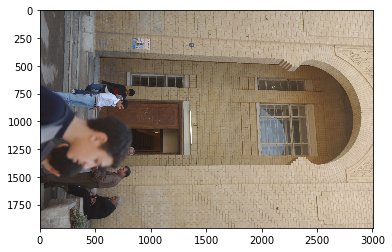

/mnt/f/OctoberJohanArchiveSample5k/JS9786.jpg
key: date created, info: b'20040115'

key: time created, info: b'134345'

key: by-line, info: b'Johan Spanner/WorldPictureNews'

key: province/state, info: b'Iraq'

key: country/primary location code, info: b'IRQ'

key: country/primary location name, info: b'Iraq'

key: credit, info: b'Johan Spanner/WorldPictureNews'

key: source, info: b'Johan Spanner/WorldPictureNews'

key: copyright notice, info: b'Johan Spanner/WorldPictureNews'

key: writer/editor, info: b'Johan Spanner/WorldPictureNews'

key: custom1, info: b'Spanner'

key: custom2, info: b'Raw'

key: custom3, info: b'2004'

key: custom4, info: b'DSC_3091.JPG'



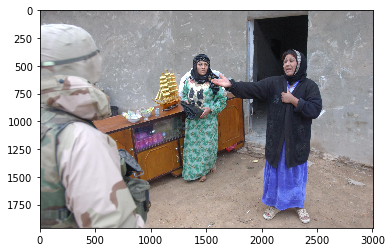

In [34]:
for i in path_list5k[0:5]:
    dst = sample_dir + '/' + i.split('/')[-1]
    
    testinfo = IPTCInfo(dst, force = True)
    print(dst)
        
    for i in IPTC_keys:
        if testinfo[i]:
            print(f'key: {i}, info: {testinfo[i]}\n')
    
    image_check(dst)